# Chapter 3 - Classification

In [48]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [49]:
# data: array with one row per instance and one column per feature
# target: an array with labels
X, y = mnist["data"], mnist["target"]

# 70000 images with 784 features (28x28 pixels) each
X.shape

(70000, 784)

In [50]:
y.shape

(70000,)

**Display a digit**

Grabbing an instance's feature vector and reshaping it into a 28x28 array

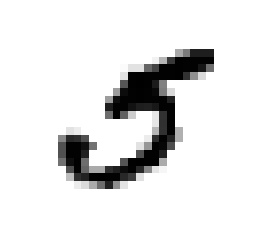

In [51]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")

plt.axis("off")
plt.show()

In [52]:
print("This was a", y[36000])

This was a 5.0


### Creating the sets

In [53]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

**Shuffling the sets to avoid similar instances in a row**

In [54]:
import numpy as np

# an array of numbers between 0-59999 (indexes)
shuffle_index = np.random.permutation(60000) 
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


### Stochastig Gradient Descent classifier

**Binary Classifier**, identifying if a digit is 5 or not.

In [55]:
y_train_5 = (y_train == 5) # 60000 bools
y_test_5 = (y_test == 5) # 10000 bools

SGD classifier

In [56]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

**Predicting a digit**

In [57]:
sgd_clf.predict([some_digit]) # the 5 we displayed earlier

array([ True])

### Evaluating the classifier (Performance Measure)

Evaluating a classifier is often significantly trickier than evaluating a regressor

K-fold cross-validation means splitting the training set into K-folds, then making predictions and evaluating them on each fold using a model trained on the remaining folds.

In [58]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

array([0.9668 , 0.96765, 0.95065])

Comparing the accuracy to a dumb classify-everything-as-not-5 class:

In [59]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        #numpy 2d array of zeros
        return np.zeros((len(X), 1), dtype=bool)

In [60]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9091 , 0.91   , 0.90985])

**Confusion matrix > K-fold cross-validation** on classifier

In [61]:
from sklearn.model_selection import cross_val_predict

# performs K-fold cross-validation, but instead of returning the evaluation scores,
# it returns the predictions made on each test fold.
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

Confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53498,  1081],
       [ 1217,  4204]])

Each row in c.matrix represents an actual class, while each column represents a predicted class.

The first row of this matrix considers non-5 images (**the negative class**): 51,391 of them were correctly classified as non-5s (*true negatives*), while the remaining 34,188 wrongly classified as 5s (*false positives*). 
The second row considers the images of 5s (**the positive class**): 1,458 were wrongly classified as non-5s (*false-negatives*), while the remaining 3,963 were correctly classified as 5s (*true positives*).

A perfect classifier would have only true positives and true negatives.  
[50000, 0],    
[0, 50000]

#### Equations

Precision of the classifier: $precision = \frac{TP}{TP + FP}$, the accuracy of the positive predictions  
TP = true positives, FP = false positives.

Recall / true positive rate: $recall = \frac{TP}{TP+FN}$, the ratio of positive instances that are correctly detected by the classifier.  
FN = false negatives.

In [63]:
from sklearn.metrics import precision_score, recall_score

print("Correct only", precision_score(y_train_5, y_train_pred), "of the time") 

Correct only 0.7954588457899716 of the time


In [64]:
print("Only detects", recall_score(y_train_5, y_train_pred), "of the 5s")

Only detects 0.7755026747832503 of the 5s


**F1 score** is precision and recall combined into a single metric. The F1 score is the *harmonic mean* of precision and recall; gives much more weight to low values (regular mean treats all values equally). High scores show only when both recall and precision is high.

In [65]:
from sklearn.metrics import f1_score

f1_score(y_train_5, y_train_pred)

0.7853540070988231

### Classifier score and threshold

Customizing threshold: increase to raise precision (but also decrease recall)

In [66]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([205187.93289179])

In [67]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

Increasing the threshold enough so that the score isn't high enough to classify it as a 5.

In [68]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

**Picking a good threshold:** Gather all the descision scores (not predicitions) and compute recall/precision for all possible thresholds.

In [69]:
from sklearn.metrics import precision_recall_curve

# the scores of all instances in the training set
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

In [70]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])

#### The relationship between precision, recall and threshold:

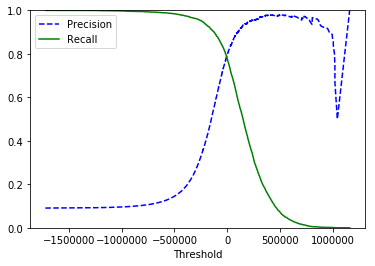

In [71]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

**Plotting recall against precision**

<function matplotlib.pyplot.show(*args, **kw)>

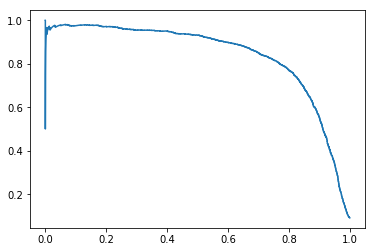

In [72]:
plt.plot(recalls, precisions)
plt.show

Picking 90% as our predictions value we need a 70.000 threshold (from the graph)

In [73]:
y_train_pred_90 = (y_scores > 70000)

Checking the scores based on our threshold

In [74]:
precision_score(y_train_5, y_train_pred_90)

0.8804483188044832

In [75]:
recall_score(y_train_5, y_train_pred_90)

0.6520937096476664

#### The *receiver operating characteristic* (ROC) curve

The true positive rate (recall) against the false positive rate.

In [76]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

The higher the recall (true posisitve rate), the more false positives (false positive rate) the classifier produces.

<function matplotlib.pyplot.show(*args, **kw)>

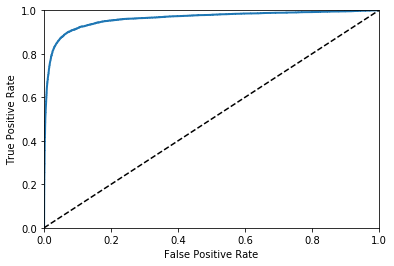

In [77]:
plot_roc_curve(fpr, tpr)
plt.show

**Computing the ROC *area under the curve* (AUC)** where 1 is a perfect classifier (the curve follows the top-left end of the graph) and 0.5 is a purely random classifier following the linear line in the middle.

In [78]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9621785221531666

### When to use the PR curve over the ROC curve

As a rule of thumb, the PR is preffered when you care more about the false positives than the false negatives, and the ROC otherwise.

---

Comparing scores between SGD classifier and Random Forest classifier.

In [79]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
# returns an array containing a row per instance and a column per class, 
# each containing the probability that the given instance belongs to the 
# given class (e.g. 70% chance the image represents a 5)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, 
                                   method = "predict_proba")

To compensate for that we don't have scores here we use the positive class' probability as the score

In [80]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

The random forest classifier's ROC curve is much better than the SGD classifier's PR curve.

/home/adrian/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


<function matplotlib.pyplot.show(*args, **kw)>

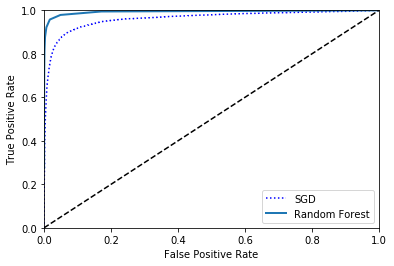

In [81]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show

Area under the curve

In [82]:
roc_auc_score(y_train_5, y_scores_forest)

0.9936161848546523

Precision score, not bad.

INSERT RECALL AND PRECISION CALCULATIONS HERE

## Multiclass Classification

Distinguishing between more than two classes. Random Forest classifiers support multiple classes directly. Linear classifiers and Support Vector Machine classifiers can use multiple *binary* classifiers to perform multiple class classification. The *one-versus-one* strategy is good for algorithms that scale poorly on big training sets (Support Vector Machine classifiers) as it instead trains many classifiers on smaller training sets. The *one-versus-all* strategy is good for algorithms that scale well with big training sets and is the most used.

Sci-kit detects when you try to use a binary classification algorithm for a multiclass classification task and runs OvA by default.

In [83]:
# the list of target classes gets stores in the classes_ attribute, ordered by value
sgd_clf.fit(X_train, y_train) # y_train, this is the original label set
sgd_clf.predict([some_digit]) # 5

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

What happened here was that, under the hood, scikit-learn trained 10 binary classifiers, and selected the class with the highest decision score (5).

#### Examining how we got 5

In [84]:
the_ten_decision_scores = sgd_clf.decision_function([some_digit])
the_ten_decision_scores

array([[-170470.15913411, -357646.68875213, -361914.44858304,
        -158505.1728401 , -441188.77298202,  205187.93289179,
        -709835.06075548, -353494.25815464, -566565.84127104,
        -562037.81446296]])

In [85]:
np.argmax(the_ten_decision_scores) # returns the index of the highest value

5

In [86]:
sgd_clf.classes_ # prints the classes we have

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [87]:
# Now we check the class the index with the highest value
sgd_clf.classes_[5] # it is, of course, 5

5.0

#### Specifying the model to use OvO instead of OvA

Simply pass a binary classifier to a OneVsOneClassifier constructor

In [89]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

array([5.])

In [91]:
len(ovo_clf.estimators_)

45

Remember, Random Forest classifiers can directly classify instances into multiple classes.

In [92]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

The list of probabilities the classifier assigned to each instance of the class on [some_digit]:

In [95]:
forest_clf.predict_proba([some_digit])

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

### Evaluating the classifiers

using cross-validation with 3 folds.

In [97]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

array([0.86862627, 0.8259913 , 0.84037606])

#### Scaling the inputs to increase accuracy

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

array([0.90936813, 0.90979549, 0.91013652])

## Error Analysis

Making predictions with cross_val_predict(), then call the confusion_matrix() function

In [100]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_matrix = confusion_matrix(y_train, y_train_pred)
conf_matrix

/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/adrian/ana

array([[5736,    2,   21,   14,    9,   47,   46,    8,   37,    3],
       [   2, 6468,   49,   28,    5,   49,    6,   11,  114,   10],
       [  61,   43, 5339,  103,   85,   26,   80,   51,  154,   16],
       [  49,   40,  139, 5347,    4,  241,   35,   50,  131,   95],
       [  19,   31,   44,    7, 5360,    9,   61,   32,   82,  197],
       [  75,   39,   35,  185,   68, 4640,  117,   29,  148,   85],
       [  33,   24,   60,    2,   41,   88, 5621,    5,   44,    0],
       [  26,   21,   67,   29,   53,    8,    5, 5783,   15,  258],
       [  52,  153,   75,  156,   12,  169,   65,   24, 5012,  133],
       [  45,   30,   29,   89,  158,   42,    2,  195,   79, 5280]])

An image representation of the matrix. The gray box of 5 could mean either; fewer images of 5s or the classifier performs worse on 5s.

<function matplotlib.pyplot.show(*args, **kw)>

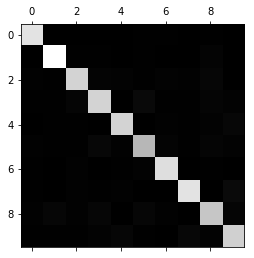

In [101]:
plt.matshow(conf_matrix, cmap=plt.cm.gray)
plt.show

#### Plotting the errors

Dividing each value in the confusion matrix by the number of images in the corresponding class (error rate). The rows represents actual classes while the column represents predicted classes. 

<function matplotlib.pyplot.show(*args, **kw)>

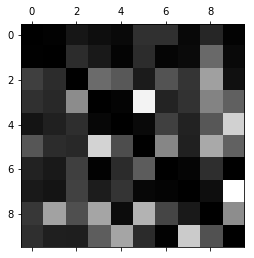

In [103]:
row_sums = conf_matrix.sum(axis=1, keepdims=True)
norm_conf_matrix = conf_matrix / row_sums
# filling the diagonal with zeros to keep only the errors
np.fill_diagonal(norm_conf_matrix, 0)
plt.matshow(norm_conf_matrix, cmap=plt.cm.gray)
plt.show

Column 9 and 8 are quite bright; many images gets misclassified as 9s and 8s.  
Row 9 and 8 are also quite bright; 9s and 8s are often confused with other digits.

Row 1 is quite dark; 1s are classified correctly.

**What can we focus to improve on based on this matrix?**  
Improve on classifying 9s and 8s, and the specific 3/5 confusion.

---

#### Analyzing individual errors (to gain insight)  
Time-consuming

In [104]:
# insert page 98 code here #

### Multilabel Classification

In [105]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

When making a prediction now it has two labels instead of one. The 5 is not large and it is odd!

In [106]:
knn_clf.predict([some_digit])

array([[False,  True]])

One of the ways to evaluate a multilabel classifier is to measure the F1 score for each individual label, then simply output the average score.

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
f1_score(y_train, y_train_knn_pred, average="macro")